# Dimension and Information Loss

We measure dimensionality vs information loss in various ways. 

TODO: 
1) Datasets: time series datasets (logistic map, chaotic attractors), image datasets (MNIST), manifold (swiss roll with extra dimensions)
2) Embedding algos: takens (TS), PCA, MLP-AE, CNN-AE, etc.
3) measure I(X,Y), reconstruciton loss (MSE/NMSE), loss in predictive power (f(x) vs. f(x_compressed)), etc. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
%run random_shannon_fcns.ipynb

In [12]:
# helper functions: 
def plot_delay(data, tau): 
    x = data[:-tau]  
    y = data[tau:]  
    
    plt.scatter(x, y, s=1, alpha=0.7)  
    plt.xlabel(f'x(t)')
    plt.ylabel(f'x(t+{tau})')
    plt.title(f'Delay Embedding (τ={tau})')
    plt.show()

In [13]:
def logistic_map(r, x_0, max_iter = 1000): 
    traj = [x_0]

    for i in range(1, max_iter): 
        x = r * traj[i-1] * (1-traj[i-1])
        traj.append(x)

    return traj

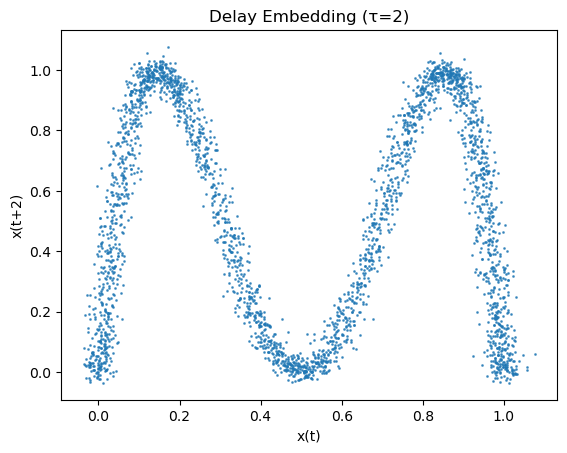

In [14]:
mu, sig = 0, 0.02
N = 3000
lgm = logistic_map(4.0, 0.3, N) + np.random.normal(mu, sig, N)
plot_delay(lgm, 2)

In [17]:
dim, delay = 20, 1
lgm_embedded = delay_embed(lgm, dim, delay)
lgm_delaypca, pca_lgm = delayPCA(lgm, dim, delay, dim)

pca_recon_loss_list = []
for i in range(2, dim+1): 
    loss, per_feature_loss = pca_recon_loss(lgm_embedded, pca_lgm, i)
    pca_recon_loss_list.append(loss)

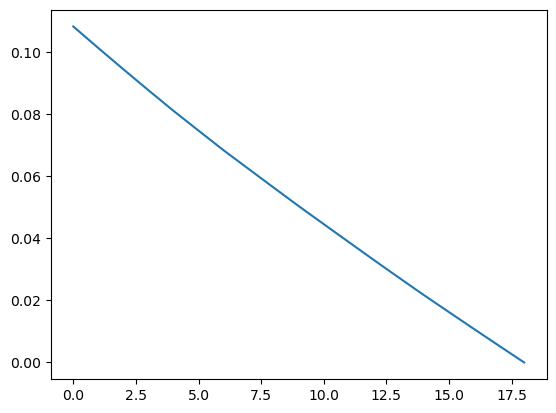

In [18]:
plt.plot(pca_recon_loss_list)
plt.show()